### 통계 : 데이터를 수집하고 분석,해석 표현하는 방법론 
- 데이터에서 유의미한 정보를 추출하고 결론을 도출해서 불확실성을 정량화한다
- 1) 기술통계 : 데이터 집합의 주요특성 요약.평균,중앙값,모드,분산,표준편차등
- 2) 추론통계 : 샘플 데이터를 기반으로 전체 모집단에 대한 추론, 가설검정,신뢰구간,회귀 분석등
- 3) 확률 모델링 : 데이터가 발생하는 확률적 모델링 (확률 이론) , 조건부확률, 확률분포

### 데이터 분석에 관련된 통계 개념 기법
- 회귀분석 : 변수간의 관계를 모델링하고 예측하는 것 (선형회귀,다중회귀)
- 시계열분석 : 시간에 따라 변화하는 데이터의 패턴을 분석하는 것 (추세, 계절성)
- 실험된 디자인 : 수집 데이터 방법을 계획하고 실험을 통해 유효성 도출
- 분류 : 데이터를 미리 정의된 범주로 분류되는 것 (로지스틱회귀 , 의사결정등 )
- 군집분석 : 유사한 특성을 가진 데이터 그룹식별, (SVM , knn)
- 주성분 분석 PCA : 다차원 데이터의 차원을 축소하는 기능
- 비모수 분석 : 모수적 가정을 하지 않는 데이터의 분석 방법
- 생존 분석 : 시간에 따른 사건 발생 분석에 사용
- 데이터 시각화

### 전처리(Preprocessing)
* 원본 raw 데이터의 품질이 좋지 않아서 가공하여 데이터의 품질을 향상시키는 과정

#### 피처 스케일링
#### (1) 표준화(Standardization) : 데이터가 평균으로 부터 얼마나 떨어져 있는지를 나타내는 값으로, 특정 범위를 벗어난 데이터를 이상치(outlier)로 간주하여 제거 한다, StandardScaler 사용, Z = (X - mean())/std()  , 정규분포, 가우시안분포(평균=0,분산=1)

#### (2) 정규화(Normalization) : 데이터의 범위를 일치시키거나 분포를 유사하게 만들어 주는 기능, 데이터의 범위를 0 ~ 1사이의 값으로 변환, MinMaxScaler, Z = (X-min())/(max()-min())


### 데이터 분석 절차
#### 데이터를 표준화를 통해 outlier를 제거하고, 그 다음에 데이터 정규화를하여 상대적 크기의 영향력을 줄인 다음 분석을 시작한다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 표준화(Standardization) (이상치 값을 제거)

In [2]:
# (1) numpy 를 이용한 표준화
# Z = (X - mean())/std()
data = np.random.randint(1000,size=(3,4))  # 0~999까지의 정수 ,(3,4) 2차원 배열
print('raw_data:\n',data)

data_stand_np = (data - np.mean(data,axis=0))/np.std(data,axis=0)
print('numpy standardized data:\n',data_stand_np)

raw_data:
 [[641 693 443 327]
 [ 55 133 970 123]
 [101 921 940 282]]
numpy standardized data:
 [[ 1.41068646  0.3342592  -1.41239633  0.94846304]
 [-0.79178849 -1.35717292  0.76826636 -1.38269913]
 [-0.61889797  1.02291371  0.64412997  0.43423609]]


In [3]:
# (2) scipy.stats 를 이용한 표준화 : zscore()
import scipy.stats as ss

data_stand_ss = ss.zscore(data)
print('scipy standardized data:\n',data_stand_ss)

scipy standardized data:
 [[ 1.41068646  0.3342592  -1.41239633  0.94846304]
 [-0.79178849 -1.35717292  0.76826636 -1.38269913]
 [-0.61889797  1.02291371  0.64412997  0.43423609]]


In [4]:
# (3) sklearn.preprocessing 를  이용한 표준화
# StandardScaler().fit_transform()  (fit() --> transform())

from sklearn.preprocessing import StandardScaler

data_stand_skl = StandardScaler().fit_transform(data)
print('sklearn standardized data:\n',data_stand_skl)

# 동일한 구현
sc = StandardScaler()    # 클래스의 인스턴스를 생성
sc.fit(data)
data_stand_skl = sc.transform(data)
print('sklearn standardized data:\n',data_stand_skl)

sklearn standardized data:
 [[ 1.41068646  0.3342592  -1.41239633  0.94846304]
 [-0.79178849 -1.35717292  0.76826636 -1.38269913]
 [-0.61889797  1.02291371  0.64412997  0.43423609]]
sklearn standardized data:
 [[ 1.41068646  0.3342592  -1.41239633  0.94846304]
 [-0.79178849 -1.35717292  0.76826636 -1.38269913]
 [-0.61889797  1.02291371  0.64412997  0.43423609]]


### 정규화(Normalization)

In [5]:
# (1) numpy를 이용한 정규화 : 0 ~ 1 범위
# Z = (X-min())/(max()-min())

data_minmax_np = (data - np.min(data,axis=0))/(np.max(data,axis=0) 
                                               - np.min(data,axis=0))
print('numpy minmax data:\n',data_minmax_np)

numpy minmax data:
 [[1.         0.7106599  0.         1.        ]
 [0.         0.         1.         0.        ]
 [0.07849829 1.         0.943074   0.77941176]]


In [6]:
# (2) sklearn.preprocessing 를  이용한 정규화
# MinMaxScaler 클래스 : fit_transform() (fit() -> transform())

from sklearn.preprocessing import MinMaxScaler

data_minmax_skl = MinMaxScaler().fit_transform(data)
print('sklearn minmax data:\n',data_minmax_skl)

# 동일한 구현
sc = MinMaxScaler()    # 클래스의 인스턴스를 생성
sc.fit(data) #정규화 (return X)
data_minmax_skl = sc.transform(data) #배열로 리턴
print('sklearn minmax data:\n',data_minmax_skl)

sklearn minmax data:
 [[1.         0.7106599  0.         1.        ]
 [0.         0.         1.         0.        ]
 [0.07849829 1.         0.943074   0.77941176]]
sklearn minmax data:
 [[1.         0.7106599  0.         1.        ]
 [0.         0.         1.         0.        ]
 [0.07849829 1.         0.943074   0.77941176]]


In [7]:
# fit_transform() 메서드
from sklearn.base import TransformerMixin

class A(TransformerMixin):
    def fit(self,X):
        print('fit:',X)
        return self
    
    def transform(self,X):
        print('transform:',X)
        return X

inst = A()  # 클래스의 인스턴스 생성
# inst.fit('x_data')
# inst.transform('y_data')
inst.fit_transform('my_data')

fit: my_data
transform: my_data


'my_data'

### 이상치를 제거하여 표준화 하기

-2.131712108481604 2.467651056434603


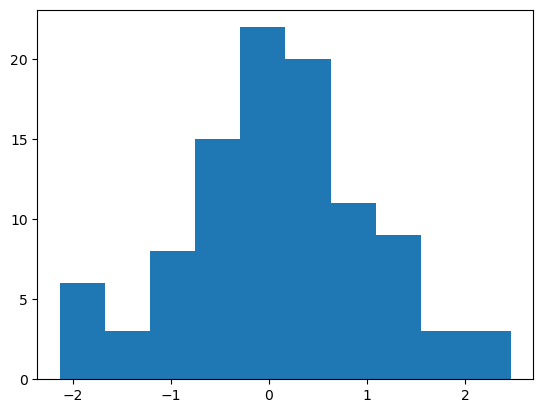

In [8]:
np.random.seed(10)
data = np.random.randn(100)   # 정규 분포를 이루는 random, 100개
#print('raw_data:\n',data)
print(np.min(data),np.max(data))
plt.hist(data)    # 정규성이 있다
plt.show()

insert outlier data
 [ 1.33158650e+00  7.15278974e-01 -1.54540029e+00 -8.38384993e-03
  6.21335974e-01 -7.20085561e-01  2.65511586e-01  1.08548526e-01
  4.29143093e-03 -1.74600211e-01  4.33026190e-01  1.20303737e+00
 -9.65065671e-01  1.02827408e+00  2.28630130e-01  4.45137613e-01
 -1.13660221e+00  1.35136878e-01  1.48453700e+00 -1.07980489e+00
 -1.97772828e+00 -1.74337230e+00  2.66070164e-01  2.38496733e+00
  1.12369125e+00  1.67262221e+00  9.91492158e-02  1.39799638e+00
 -2.71247988e-01  6.13204185e-01 -2.67317189e-01 -5.49309014e-01
  1.32708296e-01 -4.76142015e-01  1.30847308e+00  1.95013279e-01
  4.00209988e-01 -3.37632337e-01  1.25647226e+00 -7.31969502e-01
  6.60231551e-01 -3.50871891e-01 -9.39433360e-01 -4.89337217e-01
 -8.04591142e-01 -2.12697639e-01 -3.39140246e-01  3.12169936e-01
  5.65152670e-01 -1.47420258e-01 -2.59053368e-02  2.89094204e-01
 -5.39879071e-01  7.08160020e-01  8.42224738e-01  2.03580797e-01
  2.39470366e+00  9.17458938e-01 -1.12272471e-01 -3.62180447e-01
 -2.

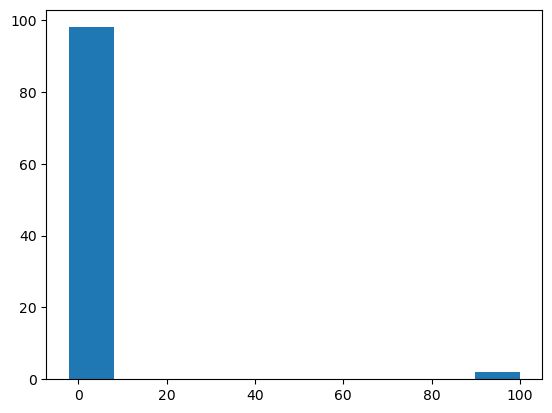

In [9]:
data[98:] = 100
print('insert outlier data\n',data)
print(np.min(data),np.max(data))
plt.hist(data)    # 정규성이 없다
plt.show()

standardized data:
 [[-0.05414927]
 [-0.09811235]
 [-0.25937343]
 [-0.14973341]
 [-0.10481359]
 [-0.20050124]
 [-0.13019562]
 [-0.14139227]
 [-0.14882924]
 [-0.16159012]
 [-0.11824629]
 [-0.06331907]
 [-0.21797641]
 [-0.07578546]
 [-0.13282648]
 [-0.11738235]
 [-0.23021263]
 [-0.13949564]
 [-0.04323885]
 [-0.2261611 ]
 [-0.29021269]
 [-0.27349537]
 [-0.13015577]
 [ 0.02099156]
 [-0.06897907]
 [-0.02982217]
 [-0.14206275]
 [-0.04941206]
 [-0.1684843 ]
 [-0.10539365]
 [-0.1682039 ]
 [-0.18831923]
 [-0.13966888]
 [-0.18310001]
 [-0.05579802]
 [-0.13522447]
 [-0.12058717]
 [-0.17321969]
 [-0.0595074 ]
 [-0.20134896]
 [-0.10203905]
 [-0.17416411]
 [-0.21614798]
 [-0.18404126]
 [-0.20652928]
 [-0.16430773]
 [-0.17332726]
 [-0.12686734]
 [-0.10882131]
 [-0.15965129]
 [-0.15098327]
 [-0.1285134 ]
 [-0.18764656]
 [-0.09862017]
 [-0.08905693]
 [-0.13461333]
 [ 0.02168608]
 [-0.08369024]
 [-0.15714409]
 [-0.17497079]
 [-0.16569762]
 [-0.1849252 ]
 [-0.06861571]
 [-0.19891226]
 [-0.15492205]
 [-0.

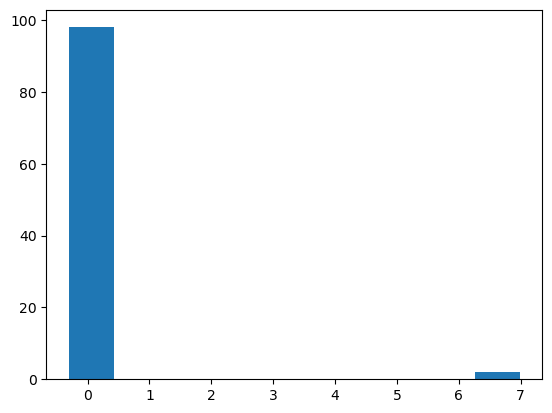

In [10]:
# sklearn 사용 표준화
data.shape    # (100,)  , 1차원
data = data.reshape(-1,1) # 반드시 2차원으로 변경하여 사용, (100,1)
data_stand_skl = StandardScaler().fit_transform(data)
print('standardized data:\n',data_stand_skl)
plt.hist(data_stand_skl)    # 정규성이 없다
plt.show()

zooin data:
 [-0.05414927 -0.09811235 -0.25937343 -0.14973341 -0.10481359 -0.20050124
 -0.13019562 -0.14139227 -0.14882924 -0.16159012 -0.11824629 -0.06331907
 -0.21797641 -0.07578546 -0.13282648 -0.11738235 -0.23021263 -0.13949564
 -0.04323885 -0.2261611  -0.29021269 -0.27349537 -0.13015577  0.02099156
 -0.06897907 -0.02982217 -0.14206275 -0.04941206 -0.1684843  -0.10539365
 -0.1682039  -0.18831923 -0.13966888 -0.18310001 -0.05579802 -0.13522447
 -0.12058717 -0.17321969 -0.0595074  -0.20134896 -0.10203905 -0.17416411
 -0.21614798 -0.18404126 -0.20652928 -0.16430773 -0.17332726 -0.12686734
 -0.10882131 -0.15965129 -0.15098327 -0.1285134  -0.18764656 -0.09862017
 -0.08905693 -0.13461333  0.02168608 -0.08369024 -0.15714409 -0.17497079
 -0.16569762 -0.1849252  -0.06861571 -0.19891226 -0.15492205 -0.18689165
 -0.07450798 -0.25032525 -0.17499352 -0.15783126 -0.1263547  -0.11625776
 -0.1645283  -0.07858183 -0.12668302  0.02688964 -0.25672849 -0.10486604
 -0.22368782 -0.20605974 -0.00753328 -

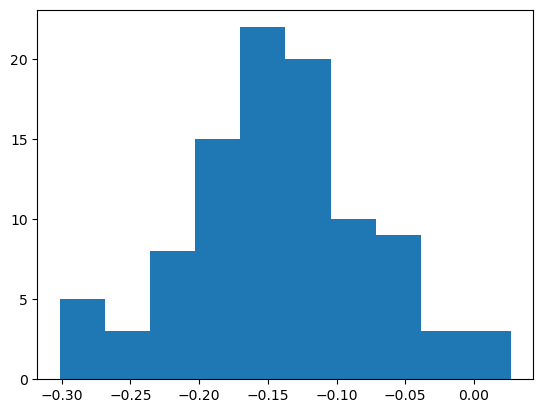

In [11]:
# 이상치의 경계값을 임의로 5로 결정 : 고정된 답이 아님, IQR을 사용하면 정확한 계산가능
data_stand_skl_zoomin = data_stand_skl[data_stand_skl < 5]
print('zooin data:\n',data_stand_skl_zoomin)
plt.hist(data_stand_skl_zoomin)    # 정규성이 있다
plt.show()

In [12]:
import pandas as pd #정규화 있다 , 없다를 판단하는 알고리즘

# 데이터 준비
data = {
    "방법": ["히스토그램", "QQ 플롯", "콜모고로프-스미르노프 검정(Kolmogorov-Smirnov Test)", 
            "샤피로-윌크 검정(Shapiro-Wilk Test)", "앤더슨-달링 검정(Anderson-Darling Test)"],
    "설명": [
        "데이터를 히스토그램으로 나타내어 정규 분포의 종 모양 곡선과 비교",
        "데이터의 분위수를 정규 분포의 분위수와 비교 (정규 분포를 따르면 직선 형성)",
        "표본 분포와 정규 분포 사이의 최대 차이를 측정",
        "표본이 정규 분포를 따르는지 검정 (작은 표본 크기에 적합)",
        "샤피로-윌크 검정과 유사하나, 꼬리 부분에 더 많은 가중치"
    ],
    "공식 / 방법론": [
        "None",
        "None",
        "D = max|F_n(x) - F(x)|",
        "W = (Σ a_i x_(i) )² / Σ (x_i - x̄)²",
        "A² = -n - Σ [(1 + 0.75/n + 2.25/n²) * ln(F(x_i)) + (1 + 0.75/n + 2.25/n²) * ln(1-F(x_(n+1-i)))]"
    ]
}
df = pd.DataFrame(data)
df

,방법,설명,공식 / 방법론
0,히스토그램,데이터를 히스토그램으로 나타내어 정규 분포의 종 모양 곡선과 비교,None
1,QQ 플롯,데이터의 분위수를 정규 분포의 분위수와 비교 (정규 분포를 따르면 직선 형성),None
2,콜모고로프-스미르노프 검정(Kolmogorov-Smirnov Test),표본 분포와 정규 분포 사이의 최대 차이를 측정,D = max|F_n(x) - F(x)|
3,샤피로-윌크 검정(Shapiro-Wilk Test),표본이 정규 분포를 따르는지 검정 (작은 표본 크기에 적합),W = (Σ a_i x_(i) )² / Σ (x_i - x̄)²
4,앤더슨-달링 검정(Anderson-Darling Test),"샤피로-윌크 검정과 유사하나, 꼬리 부분에 더 많은 가중치",A² = -n - Σ [(1 + 0.75/n + 2.25/n²) * ln(F(x_i...


귀무가설 : 데이터가 정규 분포를 따른다  
검정 결과로 얻은 p- 값이 특정유의수준이라는 범위 값이 있음 (ex:0.05 보다 작으면 귀무가설을 기각하고 정규분포를 따르지 않아다라고 판단)  
반면 p-값이 유의수준보다 크면 귀무가설을 기갈할 충분한 증거가 없으므로 데이터가 정규 분포를 따른다고 간주한다.

### 레이블 인코딩(Label Encoding)

In [19]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '믹서', '선풍기','믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 아래 한줄로도 가능
# labels = LabelEncoder().fit_transform(items)  # 1차원 배열, 리스트, 시리즈 객체를 인자로 입력

print('encoding 변환 값:',labels)

encoding 변환 값: [0 1 4 5 3 2 3 2]


In [14]:
print('encoding 클래스:',encoder.classes_)

encoding 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [15]:
print('decoding 원본 값:',encoder.inverse_transform([0,1,3,5,4,2,4,5]))

decoding 원본 값: ['TV' '냉장고' '선풍기' '컴퓨터' '전자레인지' '믹서' '전자레인지' '컴퓨터']
